In [2]:
#!pip install fastbook
#!pip install -Uqq duckduckgo_search
from fastbook import *
from duckduckgo_search import ddg_images
from fastcore.all import *

In [9]:
def search_images(term, max_images=200): return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [6]:
urls = search_images('bird photos', max_images=1)
urls[0]

'https://2.bp.blogspot.com/-LZ4VixDdVoE/Tq0ZhPycLsI/AAAAAAAADDM/OKyayfW-z4U/s1600/beautiful_Birds_wallpapers_pictures_Kingfisher_Lilac+Breasted+Roller+Bird.JPG'

In [8]:
urls=search_images('ice cream photos', max_images=1)
urls[0]

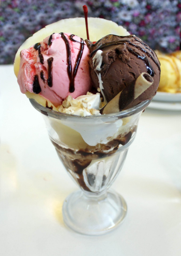

In [10]:
#Download the photo of ice cream

from fastdownload import download_url
dest = 'icecream.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

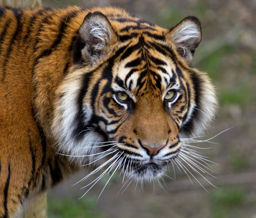

In [10]:
#let's try with tiger photo
download_url(search_images('tiger photos', max_images=1)[0], 'tiger.jpg', show_progress=False)
Image.open('tiger.jpg').to_thumb(256,256)

In [11]:
searches = 'icecream', 'tiger'
path= Path('icecream_or_not')

if not path.exists():
    for o in searches:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results=search_images_ddg(f'{o} photo')
        download_images(dest, urls=results[:200])
        resize_images(dest, max_size=400, dest=dest)

In [12]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


0

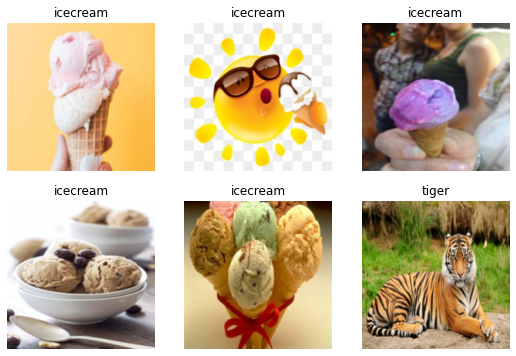

In [13]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [22]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(3)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,0.552364,0.063465,0.011583,00:07


/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


epoch,train_loss,valid_loss,error_rate,time
0,0.143783,0.020596,0.007722,00:07
1,0.057557,0.001352,0.000000,00:08
2,0.038666,0.001703,0.000000,00:07


/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/TiffImagePlugin.py:850: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [23]:
is_icecream,_,probs = learn.predict(PILImage.create('icecream.jpg'))
print(f"This is a: {is_icecream}.")
print(f"Probability it's a icecream: {probs[0]:.4f}")

This is a: icecream.
Probability it's a icecream: 0.9998


# Now I want to build a classifier which will predict is given a photo, if it is honeydew melon because I often get confused between honeydew and cantaloupe

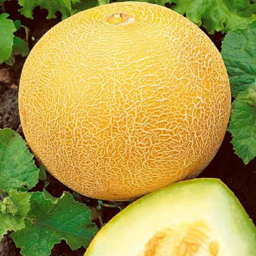

In [18]:
urls = search_images('honeydewmelon photos', max_images=1)
urls[0]

from fastdownload import download_url
dest = 'honeydewmelon.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

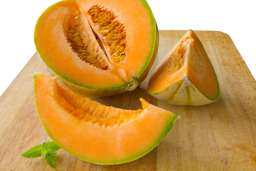

In [19]:
urls = search_images('cantaloupe photos', max_images=1)
urls[0]

from fastdownload import download_url
dest = 'cantaloupe.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

In [39]:
searches = 'honeydewmelon fruit', 'cantaloupe fruit'
path= Path('honeydewmelon_or_not')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
#     sleep(10)  # Pause between searches to avoid over-loading server
#     download_images(dest, urls=search_images(f'{o} sun photo'))
#     sleep(10)
#     download_images(dest, urls=search_images(f'{o} shade photo'))
#     sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
/home/jupyter-apaddo/.local/lib/python3.9/site-packages/PIL/Image.py:979: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [40]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

3

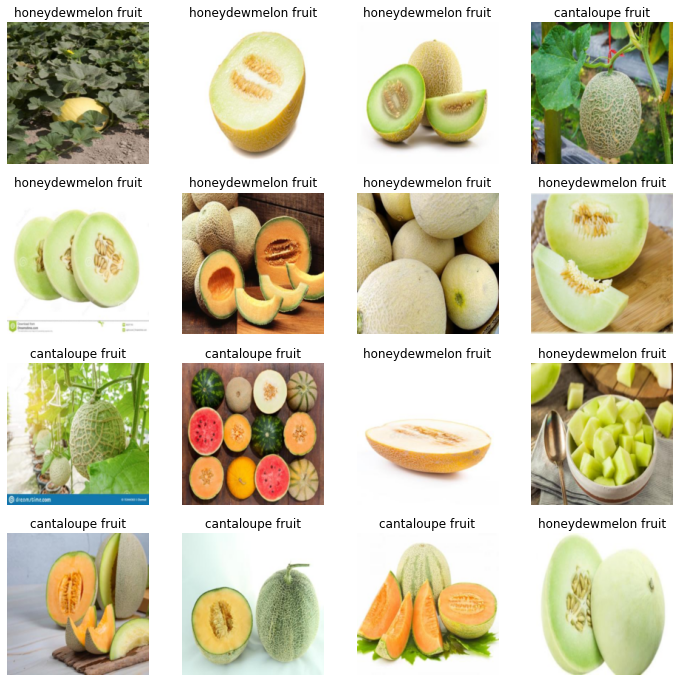

In [42]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=16)

In [43]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(3)

epoch,train_loss,valid_loss,error_rate,time
0,1.137014,1.776286,0.526316,00:01


epoch,train_loss,valid_loss,error_rate,time
0,0.632279,1.028219,0.355263,00:01
1,0.555991,1.108647,0.381579,00:01
2,0.455584,1.052863,0.328947,00:01


In [45]:
is_honeydewmelon,_,probs = learn.predict(PILImage.create('honeydewmelon.jpg'))
print(f"This is a: {is_honeydewmelon}.")
print(f"Probability it's a honeydewmelon: {probs[0]:.4f}")

This is a: honeydewmelon fruit.
Probability it's a honeydewmelon: 0.4836


Ok so model even has difficulty learning this.

# Not just for image recognition

In [24]:
#for target/prediction
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path, bs=8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt', dtype=str)
)

learn = unet_learner(dls, resnet34)
learn.fine_tune(8)

/home/jupyter-apaddo/.local/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /home/jupyter-apaddo/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,time
0,3.135401,2.475556,00:01


epoch,train_loss,valid_loss,time
0,1.916206,1.610969,00:01
1,1.663234,1.534698,00:01
2,1.488000,1.183920,00:01
3,1.313930,0.954093,00:01
4,1.166326,0.842702,00:01
5,1.043420,0.836949,00:01
6,0.943312,0.787298,00:01
7,0.865646,0.780649,00:01


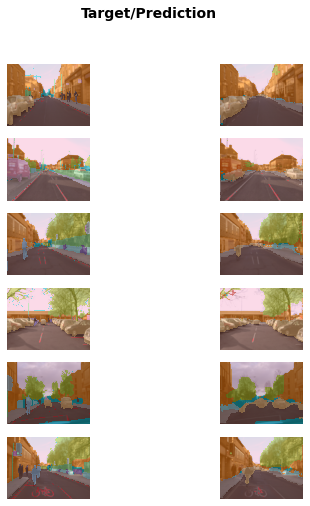

In [25]:
learn.show_results(max_n=6, figsize=(7,8))

In [26]:
#for NLP

In [27]:
from fastai.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB), valid='test')
learn = text_classifier_learner(dls, AWD_LSTM, drop_mult=0.5, metrics=accuracy)
learn.fine_tune(4, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.465931,0.440885,0.794200,00:39


epoch,train_loss,valid_loss,accuracy,time
0,0.305731,0.235889,0.903640,01:17
1,0.247041,0.226555,0.909120,01:20
2,0.189373,0.194986,0.926960,01:22
3,0.149245,0.201492,0.926760,01:23


In [28]:
learn.predict("I really liked that movie!")

('pos', tensor(1), tensor([4.0972e-05, 9.9996e-01]))

In [29]:
learn.predict("It was okay but I got sleepy during the movie. Except the hero's performance, I could hardly say this movie was good!")

('neg', tensor(0), tensor([0.7755, 0.2245]))

In [30]:
text="There is a saying that lightning never strikes the same place twice. Many of us, however, probably experienced a series of misfortunes at least once in our lives. When something bad happens, you think, “Alright, that should be it. Nothing worse can happen to me now”–and then it happens. But I guess few people have had a day (or night) as bad as Connie Nikas, the main character of an American criminal drama called “Good Time.” Really, just how unfortunate can a man be? Filmed in 2017 by Josh and Benny Safdie, the movie is their debut. Starring Robert Pattinson as Connie, the film reveals him not only as a brilliant actor, but also redeems him of his role in the “Twilight” saga. In other words, Connie looks totally different from what you would have expected of Pattinson, considering his previous characters. I will get to this aspect later; for now, let me briefly review the movie’s plot. So, spoilers ahead—consider yourself warned. Let’s go. It starts with Connie breaking into a psychiatric clinic, where a psychiatrist interviews his brother Nick. Nick suffers from some kind of an autistic spectrum disorder, so he needs to go into therapy. Connie believes it only hurts his brother, so he interrupts one of such sessions and takes him away from the clinic. Together, they rob a bank: as far as I understood, they need money to buy a farm where they can live all by themselves, of which they dream together. The brothers manage to escape with the money in a getaway car, but the bag with the money has an exploding dye pack in it as a safety measure to mark the robbers for the police. Nick and Connie have to make a stop at a restaurant to wash the dye away. Later, as they walk down the street, a police patrol officer stops them for an identification check; Nick panics and runs, causing the police to chase the two brothers. Connie flees, but Nick gets arrested. In order to bail out his brother, Connie needs money. What they have taken from the bank is not enough, so Connie must collect $10,000 more. He tries to convince his girlfriend to use her mother’s money, but the bank card turns out to be blocked. Connie learns that Nick is in a hospital after a fight in a probationary ward. Desperate, he kidnaps somebody he believes to be Nick, but because of a mistake, he frees the wrong guy. At Connie’s place, Ray, the rescued criminal, tells him about a drug stash. Upon selling the drugs, Connie (who is already being searched by the police for the robbery) might get just enough money to bail out his brother. Ray, however, does not intend to let the money go. He calls his friend Caliph, and together they decide to kill Connie and take the drugs. Meanwhile, the police surrounds Connie’s apartment complex. The latter tries to escape through the main entrance but gets caught. Ray, in his turn, makes an attempt to climb out of a window, which is high above the ground, and hide in another apartment, but slips and falls down. In the end, the movie shows Nick attending a psychiatric session again. He is placed in a group of developmentally delayed people, and although he hates it, he seems to realize he is not going out this time. Now, I have already mentioned Robert Pattinson’s brilliant acting in this movie. From a glossy metrosexual vampire he turned into a shabby, low-life “white trash” guy. Yes, I do know he had other roles besides Edward Cullen, But just as there is always going to be a part of Harry Potter in Daniel Radcliffe, so will Edward be a part of Pattinson–at least for people of my generation. Anyways, in “Good Time,” there is nothing left from the “old” Pattinson, so to say. A witty, risky, criminally inclined thug with a difficult life, he wants only to live a solitary life in peace with his brother–the only person he seems to truly care about. Bank robbery was perhaps the only way he could think of to get the money quickly. Ironically, Nick becomes the reason why the plan fails. What I liked about Connie though is how he never gave up. Despite all the difficulties, despite obstacles piling up, he keeps looking for ways to overcome them. Brother got arrested? Bail him out. No money? Kidnap him from a guarded hospital chamber. Mistook Nick for another guy? Develop a new plan of how to get the money. Failed? Try to escape and start all over again. Improvising on the fly, Connie demonstrates an incredible ability to extricate himself from hopeless situations. He lies, uses his charm, and makes people believe him so masterfully that I almost admired him–although, in some sense, him and his brother are anti-heroes. The movie’s pace (or rather, the suspense) quickly increases. It reminded me of one of my favorite movies, “The Talented Mr. Ripley.” Indeed, Connie and Ripley are somewhat alike. Both are nobodies; both virtuously manipulate other people in order to reach personal goals; both are skilled in improvisation, and are unlikely to give up in difficult situations. And, just as in “The Talented Mr. Ripley,” Connie gradually pulls himself into bigger and bigger trouble. Other characters are detailed and vivid as well. I felt sympathy for Nick. Unable to take full responsibility for his actions, he becomes a victim of his brother’s ambition. I felt compassion towards Crystal and Corey–women Connie uses for his plans. I even felt pity for Ray: a slave to his addictions. These, as well as other characters shown in the movie, created an incredibly convincing picture of the bottom of American society and contributed to the atmosphere displayed by the film. The acting and characters is not the only pillar the movie stands on. The visual images in “Good Time” are as important as the characters. A dull, gloomy picture filled with blueish and red neon lights perfectly conveys the mood of hopelessness, of endless days filled with poverty and the same routine. The greater part of the movie unfolds in the dark, on night streets, in urban slums. Connie’s desire to get out of this dump becomes almost tangible, and his idea with the robbery starts looking like his only chance for a normal life. The camerawork always emphasizes the atmosphere in the film, and at some point, I found myself perceiving “Good Times” almost as a documentary. And oh yes, the music. It is fantastic. The soundtrack was composed by Oneothrix Point Never, a composer of experimental electronic music based in Massachusetts. After watching the film, I went directly to iTunes and downloaded his official “Good Time” soundtrack album–and I recommend you doing the same. In fact, it is so good, it won the Soundtrack Award at the Cannes Festival 2017. You should rather listen to it yourself–or, which is better, watch the movie and hear the soundtrack alongside the story. Overall, “Good Time” is a strong drama with complex characters, great visuals, and unforgettable music. It is a movie about criminals, but unlike most gangster movies, you will not find any romanticism or nostalgia here. It is a dark, hopeless underworld existing right next to our everyday lives—an underside of our society. Things depicted in “Good Time” happen every day–and this film is your peephole to the other side."

learn.predict(text)

('pos', tensor(1), tensor([0.0596, 0.9404]))

# Income prediction

In [31]:
from fastai.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [32]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.386622,0.357675,0.837224,00:02
1,0.366490,0.346473,0.840602,00:02
2,0.351598,0.342971,0.847512,00:02


# Recommendation of movies

In [33]:
from fastai.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.521906,1.385062,00:00


epoch,train_loss,valid_loss,time
0,1.357485,1.327641,00:00
1,1.266827,1.153042,00:00
2,1.019040,0.860750,00:00
3,0.793723,0.732799,00:00
4,0.684019,0.701004,00:00
5,0.649968,0.692002,00:00
6,0.630840,0.688044,00:00
7,0.619747,0.685597,00:00
8,0.612448,0.684964,00:00
9,0.598577,0.684888,00:00


In [34]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,81.0,62.0,4.5,4.100853
1,11.0,56.0,4.0,3.839554
2,64.0,95.0,4.5,4.271087
3,21.0,68.0,3.0,3.265215
4,41.0,25.0,5.0,3.600184
5,73.0,20.0,4.0,3.801437
6,61.0,46.0,3.0,3.073164
7,76.0,54.0,2.0,3.844132
8,27.0,4.0,3.0,3.673654
